# Project 2 Exploratory Data Analysis (continued)

### Author: Daniel Alvarez

### Data definitions can be found on the Kaggle competition website here:
https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data

### Continuation from initial data clean notebook

Next steps:
  - Explore variables related to number of people in households (overcrowdedness indicators)
  - Explore variables related to region/area type (urban/rural)
  
### First Stage To-dos:

 - groupby/cross-tabs
 - Come up with assumptions on how to treat NaN (missing)

### Second Stage To-dos:
 - Compare to Target (distributions, crosstabs, graphs)

In [1]:
### Import packages
import os
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import csv
import seaborn as sns

3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.13.3
0.20.3


In [38]:
# Read in csv and create a dataframe using pandas
train = pd.read_csv('./IADB_data/train.csv')
df = pd.DataFrame(train)

## Explore region type/area variables

Region/area type: lugar1 lugar2 lugar3 lugar4 lugar5 lugar6 area1 area2

- lugar1 =1 region Central
- lugar2 =1 region Chorotega
- lugar3 =1 region Pacifico Central
- lugar4 =1 region Brunca
- lugar5 =1 region Huetar Atlantica
- lugar6 =1 region Huetar Norte
- area1 =1 zona urbana
- area2 =2 zona rural

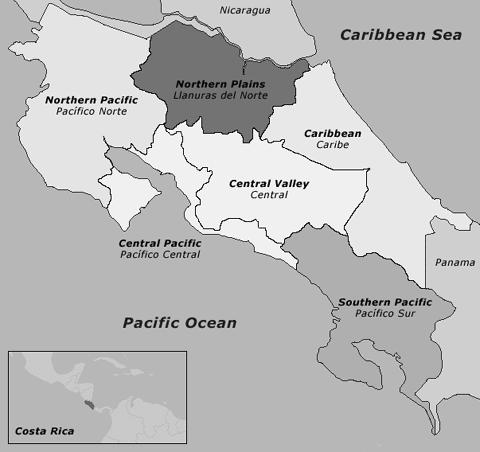

In [268]:
from IPython.display import Image
Image("regions_costarica.jpg", width = 300)

In [127]:
# Create subset of larger dataset
regions = df[['Target','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','area1','area2']]
regions = regions.rename(columns={'Target': 'PovertyLevel', 'lugar1': 'Central', 'lugar2': 'Chorotega', 'lugar3': 'PacificoCentral', 'lugar4': 'Brunca', 'lugar5': 'HuetarAtlantica', 'lugar6': 'HuetarNorte', 'area1': 'Urban_area', 'area2': 'Rural_area'})
regions.head()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
0,4,1,0,0,0,0,0,1,0
1,4,1,0,0,0,0,0,1,0
2,4,1,0,0,0,0,0,1,0
3,4,1,0,0,0,0,0,1,0
4,4,1,0,0,0,0,0,1,0


### Describe the regions dataset

In [80]:
# Size of dataframe
print(regions.shape) 

# Information of dataframe
print(regions.info())

# Length of dataframe
print(len(regions))

# Counts of each variable, excluding NaN values
print(regions.count())

(9557, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 9 columns):
PovertyLevel       9557 non-null int64
Central            9557 non-null int64
Chorotega          9557 non-null int64
PacificoCentral    9557 non-null int64
Brunca             9557 non-null int64
HuetarAtlantica    9557 non-null int64
HuetarNorte        9557 non-null int64
Urban_area         9557 non-null int64
Rural_area         9557 non-null int64
dtypes: int64(9)
memory usage: 672.1 KB
None
9557
PovertyLevel       9557
Central            9557
Chorotega          9557
PacificoCentral    9557
Brunca             9557
HuetarAtlantica    9557
HuetarNorte        9557
Urban_area         9557
Rural_area         9557
dtype: int64


In [121]:
# Poverty Level distribution by regions and area type
regions.groupby('PovertyLevel').sum()

,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
PovertyLevel,,,,,,,,
1,325,77,83,98,103,69,500,255
2,752,161,128,175,213,168,1052,545
3,616,117,112,112,143,109,781,428
4,3923,531,273,406,438,425,4496,1500


In [346]:
# Frequency distributions by Poverty Level
regionsdist = regions
for i in range(0,4):
    regionsdist.loc[i, ['PovertyLevel']] = i + 1
    regionsdist.loc[i, ['Central']] = regions[(regions.PovertyLevel == i+1) & (regions.Central == 1)].count()/regions['Central'].sum()
    regionsdist.loc[i, ['Chorotega']] = regions[(regions.PovertyLevel == i+1) & (regions.Chorotega == 1)].count()/regions['Chorotega'].sum()
    regionsdist.loc[i, ['PacificoCentral']] = regions[(regions.PovertyLevel == i+1) & (regions.PacificoCentral == 1)].count()/regions['PacificoCentral'].sum()
    regionsdist.loc[i, ['Brunca']] = regions[(regions.PovertyLevel == i+1) & (regions.Brunca == 1)].count()/regions['Brunca'].sum()
    regionsdist.loc[i, ['HuetarAtlantica']] = regions[(regions.PovertyLevel == i+1) & (regions.HuetarAtlantica == 1)].count()/regions['HuetarAtlantica'].sum()
    regionsdist.loc[i, ['HuetarNorte']] = regions[(regions.PovertyLevel == i+1) & (regions.HuetarNorte == 1)].count()/regions['HuetarNorte'].sum()
    regionsdist.loc[i, ['Urban_area']] = regions[(regions.PovertyLevel == i+1) & (regions.Urban_area == 1)].count()/regions['Urban_area'].sum()
    regionsdist.loc[i, ['Rural_area']] = regions[(regions.PovertyLevel == i+1) & (regions.Rural_area == 1)].count()/regions['Rural_area'].sum()
regionsdist = regionsdist[0:4]
regionsdist

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
0,1,0.057901,0.086810,0.139029,0.123738,0.114699,0.089378,0.073249,0.093441
1,2,0.133975,0.181511,0.214406,0.220960,0.237194,0.217617,0.154117,0.199707
2,3,0.109745,0.131905,0.187605,0.141414,0.159243,0.141192,0.114415,0.156834
3,4,0.698201,0.598648,0.457288,0.512627,0.487751,0.550519,0.658072,0.549652


In [347]:
# Transpose regions frequency distribution dataset
regionsdist_transpose = regionsdist.T
regionsdist_transpose.columns = ["Extreme Poverty","Moderate Poverty","Vulnerable Households","Non-vulnerable households"]
regionsdist_transpose2 = regionsdist_transpose.drop(['PovertyLevel','Urban_area','Rural_area'],axis=0)
areatype_transpose = regionsdist_transpose.drop(['PovertyLevel','Central','Chorotega','PacificoCentral','Brunca','HuetarAtlantica','HuetarNorte'],axis=0)
regionsdist_transpose2

,Extreme Poverty,Moderate Poverty,Vulnerable Households,Non-vulnerable households
Central,0.057901,0.133975,0.109745,0.698201
Chorotega,0.086810,0.181511,0.131905,0.598648
PacificoCentral,0.139029,0.214406,0.187605,0.457288
Brunca,0.123738,0.220960,0.141414,0.512627
HuetarAtlantica,0.114699,0.237194,0.159243,0.487751
HuetarNorte,0.089378,0.217617,0.141192,0.550519


In [348]:
areatype_transpose

,Extreme Poverty,Moderate Poverty,Vulnerable Households,Non-vulnerable households
Urban_area,0.073249,0.154117,0.114415,0.658072
Rural_area,0.093441,0.199707,0.156834,0.549652


##### Plot bar chart of percentage frequencies

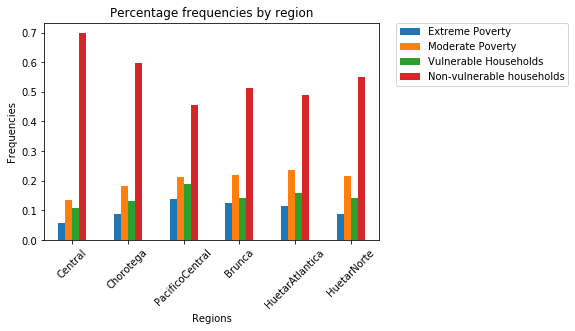

In [349]:
regionsdist_transpose2.plot(kind="bar")
#overcrowded2.hist('Overcrowdingbybedrooms')
plt.xlabel("Regions")
plt.ylabel("Frequencies")
plt.title("Percentage frequencies by region")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

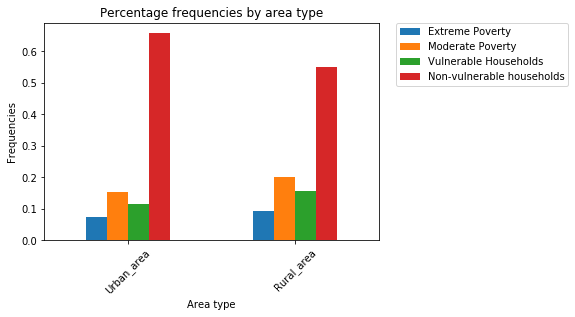

In [350]:
areatype_transpose.plot(kind="bar")
plt.xlabel("Area type")
plt.ylabel("Frequencies")
plt.title("Percentage frequencies by area type")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [298]:
from matplotlib import rc

# Data
r = [0,1,2,3,4,5,6,7]


#raw_data = {'redBars': regionsdist[regionsdist.PovertyLevel==1], 'orangeBars': regionsdist[regionsdist.PovertyLevel==2],'blueBars': regionsdist[regionsdist.PovertyLevel==3], 'lightblueBars': regionsdist[regionsdist.PovertyLevel==4]}
#df = pd.DataFrame(raw_data)
 
# From raw value to percentage
#totals = [i+j+k+l for i,j,k,l in zip(df['redBars'], df['orangeBars'], df['blueBars'], df['lightblueBars'])]
#redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
#orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
#blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
#lightblueBars = [i / j * 100 for i,j in zip(df['lightblueBars'], totals)]

width = 0.5
names = (regionsdist.columns)
header = ["Extreme Poverty","Moderate Poverty","Vulnerable","Non-vulnerable"]
dataset1 = np.array(regionsdist.PovertyLevel==1)
dataset2 = np.array(regionsdist.PovertyLevel==2)
dataset3 = np.array(regionsdist.PovertyLevel==3)
dataset4 = np.array(regionsdist.PovertyLevel==4)

configs = dataset1[0]
N = len(configs)
ind = np.arange(N)

# plot
p1 = plt.bar(ind, dataset1, width, color='r')
p2 = plt.bar(ind, dataset2, width, bottom=dataset1, color='b')
p3 = plt.bar(ind, dataset3, width, bottom=dataset1+dataset2, color='g')
p4 = plt.bar(ind, dataset4, width, bottom=dataset1+dataset2+dataset3, color='c')
                        
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Region or Area Type")
plt.legend((p1[0], p2[0], p3[0], p4[0]), (header[0], header[1], header[2], header[3]), fontsize=12, ncol=4, framealpha=0, fancybox=True) 
    
# Show graphic
plt.show()


TypeError: object of type 'numpy.bool_' has no len()

In [149]:
pd.crosstab(regions.PovertyLevel, regions.Urban_area, normalize='index')

Urban_area,0,1
PovertyLevel,,
1,0.337748,0.662252
2,0.341265,0.658735
3,0.354012,0.645988
4,0.250167,0.749833


In [150]:
pd.crosstab(regions.PovertyLevel, regions.Rural_area, normalize='index')

Rural_area,0,1
PovertyLevel,,
1,0.662252,0.337748
2,0.658735,0.341265
3,0.645988,0.354012
4,0.749833,0.250167


In [138]:
regions2 = regions.drop(['PovertyLevel','Urban_area','Rural_area'],axis=1)
print("Counts by region")
region2counts = regions2.sum()
region2counts

Counts by region


Central            5616
Chorotega           886
PacificoCentral     596
Brunca              791
HuetarAtlantica     897
HuetarNorte         771
dtype: int64

In [304]:
# Percentage Frequency by region
print("Percentage frequency by region")
regions2freq = region2counts/region2counts.sum()
regions2freq

Percentage frequency by region


Central            0.587632
Chorotega          0.092707
PacificoCentral    0.062363
Brunca             0.082767
HuetarAtlantica    0.093858
HuetarNorte        0.080674
dtype: float64

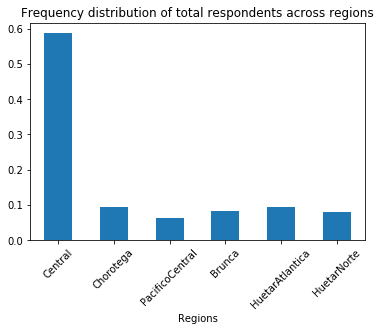

In [311]:
# Plot frequency percentages across regions
regions2freq[0:6].plot(kind='bar')
plt.title('Frequency distribution of total respondents across regions')
plt.xlabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [141]:
regions3 = regions.drop(['PovertyLevel','Central','Chorotega','PacificoCentral', 'Brunca', 'HuetarAtlantica', 'HuetarNorte'],axis=1)
print("Counts by type of area")
region3counts = regions3.sum()
region3counts

Counts by type of area


Urban_area    6829
Rural_area    2728
dtype: int64

In [312]:
# Percentage Frequency by region
print("Percentage frequency by type of area")
regions3freq = region3counts/region3counts.sum()
regions3freq

Percentage frequency by type of area


Urban_area    0.714555
Rural_area    0.285445
dtype: float64

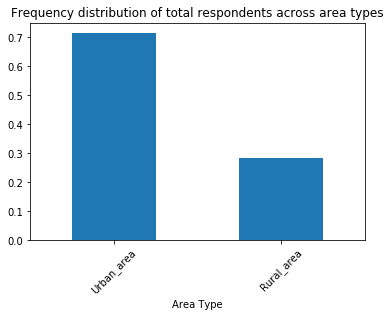

In [313]:
# Plot frequency percentages across area types
regions3freq[0:2].plot(kind='bar')
plt.title('Frequency distribution of total respondents across area types')
plt.xlabel("Area Type")
plt.xticks(rotation=45)
plt.show()

 - Percentage frequencies summarizing
 - Bar chart by region
 - Map with figures overlaid

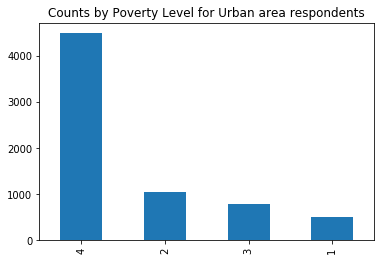

In [159]:
regions[regions.Urban_area == 1].PovertyLevel.value_counts().plot(kind='bar')
plt.title('Counts by Poverty Level for Urban area respondents')
plt.show()

In [131]:
# Number of counts in Central
regions.groupby('Central').count()

,PovertyLevel,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Central,,,,,,,,
0,3941,3941,3941,3941,3941,3941,3941,3941
1,5616,5616,5616,5616,5616,5616,5616,5616


In [56]:
# Distribution of counts in Central over other regions and area
regions.groupby('Central').sum()

,PovertyLevel,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Central,,,,,,,,
0,12191,886,596,791,897,771,2023,1918
1,19369,0,0,0,0,0,4806,810


In [57]:
# Number of counts in Chorotega
regions.groupby('Chorotega').count()

,PovertyLevel,Central,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Chorotega,,,,,,,,
0,8671,8671,8671,8671,8671,8671,8671,8671
1,886,886,886,886,886,886,886,886


In [58]:
# Distribution of counts in Chorotega over other regions and area
regions.groupby('Chorotega').sum()

,PovertyLevel,Central,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Chorotega,,,,,,,,
0,28686,5616,596,791,897,771,6295,2376
1,2874,0,0,0,0,0,534,352


In [28]:
# Number of counts in PacificoCentral
regions.groupby('PacificoCentral').count()

,PovertyLevel,Central,Chorotega,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
PacificoCentral,,,,,,,,
0,8961,8961,8961,8961,8961,8961,8961,8961
1,596,596,596,596,596,596,596,596


In [59]:
# Distribution of counts in PacificoCentral over other regions and area
regions.groupby('PacificoCentral').sum()

,PovertyLevel,Central,Chorotega,Brunca,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
PacificoCentral,,,,,,,,
0,29793,5616,886,791,897,771,6416,2545
1,1767,0,0,0,0,0,413,183


In [29]:
# Number of counts in Brunca
regions.groupby('Brunca').count()

,PovertyLevel,Central,Chorotega,PacificoCentral,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Brunca,,,,,,,,
0,8766,8766,8766,8766,8766,8766,8766,8766
1,791,791,791,791,791,791,791,791


In [60]:
# Distribution of counts in Brunca over other regions and area
regions.groupby('Brunca').sum()

,PovertyLevel,Central,Chorotega,PacificoCentral,HuetarAtlantica,HuetarNorte,Urban_area,Rural_area
Brunca,,,,,,,,
0,29152,5616,886,596,897,771,6501,2265
1,2408,0,0,0,0,0,328,463


In [30]:
# Number of counts in HuetarAtlantica
regions.groupby('HuetarAtlantica').count()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarNorte,Urban_area,Rural_area
HuetarAtlantica,,,,,,,,
0,8660,8660,8660,8660,8660,8660,8660,8660
1,897,897,897,897,897,897,897,897


In [61]:
# Distribution of counts in HuetarAtlantica over other regions and area
regions.groupby('HuetarAtlantica').sum()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarNorte,Urban_area,Rural_area
HuetarAtlantica,,,,,,,,
0,28850,5616,886,596,791,771,6329,2331
1,2710,0,0,0,0,0,500,397


In [31]:
# Number of counts in HuetarNorte
regions.groupby('HuetarNorte').count()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,Urban_area,Rural_area
HuetarNorte,,,,,,,,
0,8786,8786,8786,8786,8786,8786,8786,8786
1,771,771,771,771,771,771,771,771


In [62]:
# Distribution of counts in HuetarNorte over other regions and area
regions.groupby('HuetarNorte').sum()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,Urban_area,Rural_area
HuetarNorte,,,,,,,,
0,29128,5616,886,596,791,897,6581,2205
1,2432,0,0,0,0,0,248,523


In [32]:
# Number of counts in urban region
regions.groupby('Urban_area').count()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Rural_area
Urban_area,,,,,,,,
0,2728,2728,2728,2728,2728,2728,2728,2728
1,6829,6829,6829,6829,6829,6829,6829,6829


In [63]:
# Distribution of counts in Urban area over other regions and area
regions.groupby('Urban_area').sum()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Rural_area
Urban_area,,,,,,,,
0,8629,810,352,183,463,397,523,2728
1,22931,4806,534,413,328,500,248,0


In [33]:
# Number of counts in rural region
regions.groupby('Rural_area').count()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area
Rural_area,,,,,,,,
0,6829,6829,6829,6829,6829,6829,6829,6829
1,2728,2728,2728,2728,2728,2728,2728,2728


In [64]:
# Distribution of counts in Rural area over other regions and area
regions.groupby('Rural_area').sum()

,PovertyLevel,Central,Chorotega,PacificoCentral,Brunca,HuetarAtlantica,HuetarNorte,Urban_area
Rural_area,,,,,,,,
0,22931,4806,534,413,328,500,248,6829
1,8629,810,352,183,463,397,523,0


### Plot variables

## Explore overcrowdedness variables
Variables: 
- idhogar = unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
- Target = the target is an ordinal variable indicating groups of income levels
- rooms = number of all rooms in the house
- bedrooms = number of bedrooms
- tamhog = size of the household
- hhsize = household size
- hacdor =1 Overcrowding by bedrooms
- hacapo =1 Overcrowding by rooms
- tamviv = number of persons living in the household


In [193]:
# Create subset of larger dataset
overcrowded = df[['idhogar','Target','rooms','bedrooms','tamhog','hhsize','hacdor','hacapo','tamviv']]
overcrowded = overcrowded.rename(columns={'idhogar':'HouseholdID', 'Target': 'PovertyLevel', 'tamhog':'household_size1', 'hhsize':'household_size2','hacdor': 'Overcrowdingbybedrooms', 'hacapo': 'Overcrowdingbyrooms', 'tamviv': 'Numberofpersons'})
overcrowded.head()

,HouseholdID,PovertyLevel,rooms,bedrooms,household_size1,household_size2,Overcrowdingbybedrooms,Overcrowdingbyrooms,Numberofpersons
0,21eb7fcc1,4,3,1,1,1,0,0,1
1,0e5d7a658,4,4,1,1,1,0,0,1
2,2c7317ea8,4,8,2,1,1,0,0,1
3,2b58d945f,4,5,3,4,4,0,0,4
4,2b58d945f,4,5,3,4,4,0,0,4


In [194]:
overcrowded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 9 columns):
HouseholdID               9557 non-null object
PovertyLevel              9557 non-null int64
rooms                     9557 non-null int64
bedrooms                  9557 non-null int64
household_size1           9557 non-null int64
household_size2           9557 non-null int64
Overcrowdingbybedrooms    9557 non-null int64
Overcrowdingbyrooms       9557 non-null int64
Numberofpersons           9557 non-null int64
dtypes: int64(8), object(1)
memory usage: 672.1+ KB


In [195]:
# Check that household size variables are the same (originally, tamhog and hhsize)
print(overcrowded['household_size1'].mean() == overcrowded['household_size2'].mean())
print(overcrowded['household_size1'].sum() == overcrowded['household_size2'].sum())

True
True


In [196]:
# Since both household size variables are the same, just keep one of them 
overcrowded=overcrowded.drop(['household_size2'],axis=1)
overcrowded=overcrowded.rename(columns={'household_size1':'household_size'})

Calculate number of people living per room and bedroom

In [197]:
overcrowded['no_people_room'] = overcrowded['Numberofpersons']/overcrowded['rooms']
overcrowded['no_people_bedroom'] = overcrowded['Numberofpersons']/overcrowded['bedrooms']

Summary statistics of calculated number of people living per room and bedroom

In [62]:
print("Summary statistics of calculated number of people per room")
print(overcrowded['no_people_room'].describe())

Summary statistics of calculated number of people per room
count    9557.000000
mean        0.889988
std         0.525668
min         0.111111
25%         0.600000
50%         0.800000
75%         1.000000
max         6.000000
Name: no_people_room, dtype: float64


In [63]:
print("Summary statistics of calculated number of people per bedroom")
print(overcrowded['no_people_bedroom'].describe())

Summary statistics of calculated number of people per bedroom
count    9557.000000
mean        1.605380
std         0.819946
min         0.200000
25%         1.000000
50%         1.500000
75%         2.000000
max         6.000000
Name: no_people_bedroom, dtype: float64


### Describe the overcrowded dataset


In [198]:
# Size of dataframe
print(overcrowded.shape) 

# Information of dataframe
print(overcrowded.info())

# Length of dataframe
print(len(overcrowded))

# Counts of each variable, excluding NaN values
print(overcrowded.count())

(9557, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 10 columns):
HouseholdID               9557 non-null object
PovertyLevel              9557 non-null int64
rooms                     9557 non-null int64
bedrooms                  9557 non-null int64
household_size            9557 non-null int64
Overcrowdingbybedrooms    9557 non-null int64
Overcrowdingbyrooms       9557 non-null int64
Numberofpersons           9557 non-null int64
no_people_room            9557 non-null float64
no_people_bedroom         9557 non-null float64
dtypes: float64(2), int64(7), object(1)
memory usage: 746.7+ KB
None
9557
HouseholdID               9557
PovertyLevel              9557
rooms                     9557
bedrooms                  9557
household_size            9557
Overcrowdingbybedrooms    9557
Overcrowdingbyrooms       9557
Numberofpersons           9557
no_people_room            9557
no_people_bedroom         9557
dtype: int64


In [199]:
# Show counts of individual respondents for a sample for a sample of households
overcrowded['HouseholdID'].value_counts().head(20)

fd8a6d014    13
0c7436de6    12
ae6cf0558    12
6b35cdcf0    11
4476ccd4c    11
3fe29a56b    11
b7a0b59d7    11
63f11d6ea    10
6a96a96c0    10
7cad2d6c4    10
f2a4cd356    10
a18c0c0be    10
0fc6c05f7    10
d4e1dc02c     9
9fd143d1f     9
9d70c1551     9
efec7e82c     9
1ed926340     9
ae489f548     9
d43a04997     9
Name: HouseholdID, dtype: int64

Create a variable for number of respondents per household


In [200]:
respondents_hh = overcrowded.groupby('HouseholdID').count().reset_index()
respondents_hh = respondents_hh[['HouseholdID','PovertyLevel']]
respondents_hh = respondents_hh.rename(columns={'PovertyLevel': 'RespondentsperHousehold'})
respondents_hh.sort_values('RespondentsperHousehold', ascending=False).head()

,HouseholdID,RespondentsperHousehold
2946,fd8a6d014,13
150,0c7436de6,12
2034,ae6cf0558,12
2132,b7a0b59d7,11
756,3fe29a56b,11


In [201]:
# merge together respondents per household with larger overcrowdedness dataset 
#overcrowded = overcrowded.set_index('HouseholdID').join(respondents_hh.set_index('HouseholdID'))
overcrowded2 = pd.merge(overcrowded, respondents_hh, on='HouseholdID')
overcrowded2.head()

,HouseholdID,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbybedrooms,Overcrowdingbyrooms,Numberofpersons,no_people_room,no_people_bedroom,RespondentsperHousehold
0,21eb7fcc1,4,3,1,1,0,0,1,0.333333,1.000000,1
1,0e5d7a658,4,4,1,1,0,0,1,0.250000,1.000000,1
2,2c7317ea8,4,8,2,1,0,0,1,0.125000,0.500000,1
3,2b58d945f,4,5,3,4,0,0,4,0.800000,1.333333,4
4,2b58d945f,4,5,3,4,0,0,4,0.800000,1.333333,4


In [202]:
# Poverty Level distribution by overcrowdedness features
overcrowded2.groupby('PovertyLevel').sum()

,rooms,bedrooms,household_size,Overcrowdingbybedrooms,Overcrowdingbyrooms,Numberofpersons,no_people_room,no_people_bedroom,RespondentsperHousehold
PovertyLevel,,,,,,,,,
1,3267,1807,3364,111,57,3451,895.426190,1543.216667,3364
2,7160,4040,6966,108,76,7234,1715.163095,3117.733333,6966
3,5718,3248,5166,59,37,5346,1192.760317,2126.516667,5110
4,31215,17091,22723,86,56,23101,4702.269841,8555.150000,22687


In [203]:
# Number of counts in Overcrowdingbybedrooms
overcrowded2.groupby('Overcrowdingbybedrooms').count()

,HouseholdID,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbyrooms,Numberofpersons,no_people_room,no_people_bedroom,RespondentsperHousehold
Overcrowdingbybedrooms,,,,,,,,,,
0,9193,9193,9193,9193,9193,9193,9193,9193,9193,9193
1,364,364,364,364,364,364,364,364,364,364


In [70]:
overcrowded2.groupby('Overcrowdingbybedrooms').sum()

,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbyrooms,Numberofpersons,no_people_room,no_people_bedroom,RespondentsperHousehold
Overcrowdingbybedrooms,,,,,,,,,
0,30712,46183,25551,35775,36,36437,7576.067063,13752.283333,35695
1,848,1177,635,2444,190,2695,929.552381,1590.333333,2432


In [71]:
# Number of counts in Overcrowdingbyrooms
overcrowded2.groupby('Overcrowdingbyrooms').count()

,HouseholdID,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbybedrooms,Numberofpersons,no_people_room,no_people_bedroom,RespondentsperHousehold
Overcrowdingbyrooms,,,,,,,,,,
0,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331
1,226,226,226,226,226,226,226,226,226,226


In [264]:
#overcrowded2_rooms = overcrowded2['Overcrowdingbyrooms']
print("Counts by overcrowding by rooms indicator")
overcrowded_rooms = overcrowded2['Overcrowdingbyrooms'].value_counts()
overcrowded_rooms

Counts by overcrowding by rooms indicator


0    9331
1     226
Name: Overcrowdingbyrooms, dtype: int64

In [314]:
# Percentage Frequency by overcrowding by rooms
print("Percentage frequency by overcrowding by rooms")
overcrowded_roomsfreq = overcrowded_rooms/overcrowded_rooms.sum()
overcrowded_roomsfreq 

Percentage frequency by overcrowding by rooms


0    0.976352
1    0.023648
Name: Overcrowdingbyrooms, dtype: float64

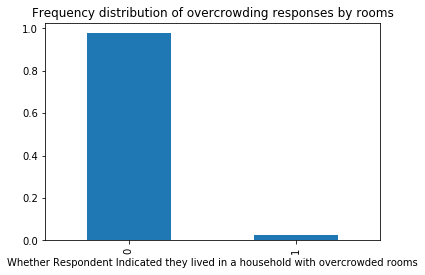

In [316]:
# Plot frequency percentages by overcrowding by rooms
overcrowded_roomsfreq [0:2].plot(kind='bar')
plt.title('Frequency distribution of overcrowding responses by rooms')
plt.xlabel("Whether Respondent Indicated they lived in a household with overcrowded rooms")
plt.xticks(rotation=90)
plt.show()

In [266]:
print("Counts by overcrowding by bedrooms indicator")
overcrowded_bedrooms = overcrowded2['Overcrowdingbybedrooms'].value_counts()
overcrowded_bedrooms

Counts by overcrowding by bedrooms indicator


0    9193
1     364
Name: Overcrowdingbybedrooms, dtype: int64

In [318]:
# Percentage Frequency by overcrowding by bedrooms
print("Percentage frequency by overcrowding by bedrooms")
overcrowded_bedroomsfreq = overcrowded_bedrooms/overcrowded_bedrooms.sum()
overcrowded_bedroomsfreq

Percentage frequency by overcrowding by bedrooms


0    0.961913
1    0.038087
Name: Overcrowdingbybedrooms, dtype: float64

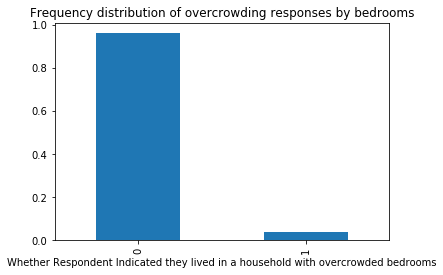

In [320]:
# Plot frequency percentages by overcrowding by bedrooms
overcrowded_bedroomsfreq [0:2].plot(kind='bar')
plt.title('Frequency distribution of overcrowding responses by bedrooms')
plt.xlabel("Whether Respondent Indicated they lived in a household with overcrowded bedrooms")
plt.show()

In [189]:
# Number of counts in Numberofpersonsliving
overcrowded2.groupby('Numberofpersons').count()

,HouseholdID,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbybedrooms,Overcrowdingbyrooms,no_people_room,no_people_bedroom,RespondentsperHousehold
Numberofpersons,,,,,,,,,,
1,355,355,355,355,355,355,355,355,355,355
2,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
3,2206,2206,2206,2206,2206,2206,2206,2206,2206,2206
4,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
5,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627
6,868,868,868,868,868,868,868,868,868,868
7,384,384,384,384,384,384,384,384,384,384
8,111,111,111,111,111,111,111,111,111,111
9,98,98,98,98,98,98,98,98,98,98


In [72]:
overcrowded2.groupby('Numberofpersons').sum()

,PovertyLevel,rooms,bedrooms,household_size,Overcrowdingbybedrooms,Overcrowdingbyrooms,no_people_room,no_people_bedroom,RespondentsperHousehold
Numberofpersons,,,,,,,,,
1,1222,1437,695,355,0,0,107.146032,217.783333,355
2,4538,6009,3045,2628,0,0,658.076190,1327.166667,2626
3,7544,10488,5581,6592,6,15,1524.641991,2922.350000,6578
4,8143,11799,6509,9553,83,12,2124.796825,3887.733333,9524
5,5168,8434,4907,8017,45,35,1741.583333,3001.916667,7979
6,2674,4617,2645,5053,36,21,1105.438961,1961.700000,5044
7,1172,2225,1361,2558,42,14,498.744444,813.750000,2558
8,308,641,400,807,31,8,174.053968,286.400000,807
9,238,554,351,822,9,36,173.789286,265.950000,822


5     2940
4     2587
6     1607
3      890
7      732
8      298
2      188
9      168
1       97
10      43
11       7
Name: rooms, dtype: int64


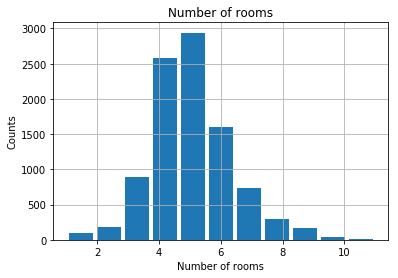

In [274]:
print(overcrowded2['rooms'].value_counts())
overcrowded2.hist('rooms',bins=11, alpha=1, rwidth=0.85)
plt.xlabel("Number of rooms")
plt.ylabel("Counts")
plt.title("Number of rooms")
plt.show()

3    3985
2    3383
4    1184
1     602
5     299
6     100
8       4
Name: bedrooms, dtype: int64


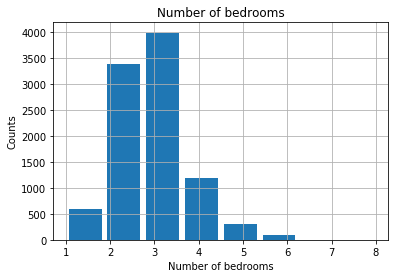

In [272]:
print(overcrowded2['bedrooms'].value_counts())
#overcrowded2.bedrooms.value_counts().plot(kind="bar")
overcrowded2.hist('bedrooms',bins=8, alpha=1, rwidth=0.85)
plt.xlabel("Number of bedrooms")
plt.ylabel("Counts")
plt.title("Number of bedrooms")
plt.show()

4     2451
3     2258
5     1590
2     1362
6      819
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: household_size, dtype: int64


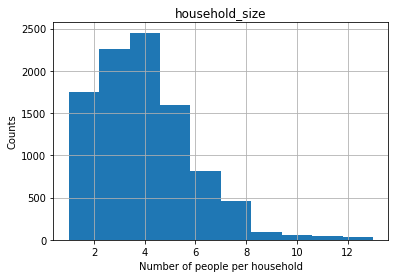

In [204]:
print(overcrowded2['household_size'].value_counts())
#overcrowded2.bedrooms.value_counts().plot(kind="bar")
overcrowded2.hist('household_size')
plt.xlabel("Number of people per household")
plt.ylabel("Counts")
plt.show()

0    9193
1     364
Name: Overcrowdingbybedrooms, dtype: int64


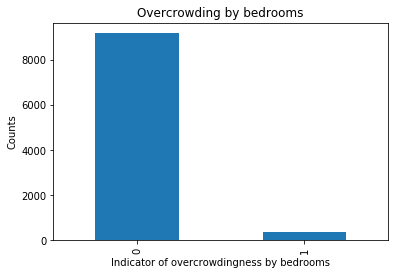

In [208]:
print(overcrowded2['Overcrowdingbybedrooms'].value_counts())
overcrowded2.Overcrowdingbybedrooms.value_counts().plot(kind="bar")
#overcrowded2.hist('Overcrowdingbybedrooms')
plt.xlabel("Indicator of overcrowdingness by bedrooms")
plt.ylabel("Counts")
plt.title("Overcrowding by bedrooms")
plt.show()

0    9331
1     226
Name: Overcrowdingbyrooms, dtype: int64


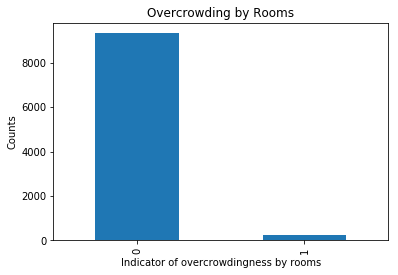

In [210]:
print(overcrowded2['Overcrowdingbyrooms'].value_counts())
overcrowded2.Overcrowdingbyrooms.value_counts().plot(kind="bar")
#overcrowded2.hist('Overcrowdingbybedrooms')
plt.xlabel("Indicator of overcrowdingness by rooms")
plt.ylabel("Counts")
plt.title("Overcrowding by Rooms")
plt.show()

4     2400
3     2206
5     1627
2     1320
6      868
7      384
1      355
8      111
9       98
10      70
11      55
13      30
12      24
15       9
Name: Numberofpersons, dtype: int64


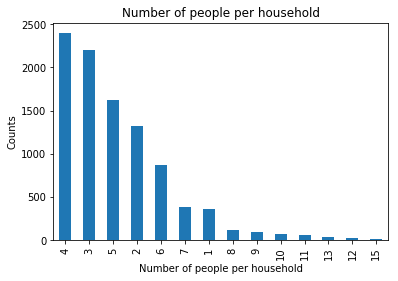

In [211]:
print(overcrowded2['Numberofpersons'].value_counts())
overcrowded2.Numberofpersons.value_counts().plot(kind="bar")
#overcrowded2.hist('Overcrowdingbybedrooms')
plt.xlabel("Number of people per household")
plt.ylabel("Counts")
plt.title("Number of people per household")
plt.show()

### To-dos
- Perform logical checks
    - rooms >= bedrooms
    - no_people_room >= no_people_bedroom
    - household_size >= RespondentsperHousehold
- Explore Overcrowdingbybedrooms compared to no_people_bedroom
- Explore Overcrowdingbyrooms compared to no_people_room
- Bar charts (distribution of people living by poverty level)
- Number of people per room by poverty level
- Number of people per bedroom by poverty level

### Logical checks

In [87]:
#Are there any cases where rooms >= bedrooms
overcrowded2[overcrowded2['rooms']<overcrowded2['bedrooms']].count()

HouseholdID                0
PovertyLevel               0
rooms                      0
bedrooms                   0
household_size             0
Overcrowdingbybedrooms     0
Overcrowdingbyrooms        0
Numberofpersons            0
no_people_room             0
no_people_bedroom          0
RespondentsperHousehold    0
dtype: int64

There are no cases where there are more bedrooms than rooms

In [89]:
#Are there any cases where number of people in rooms is greater than number of people in bedrooms
overcrowded2[overcrowded2['no_people_room']>overcrowded2['no_people_bedroom']].count()

HouseholdID                0
PovertyLevel               0
rooms                      0
bedrooms                   0
household_size             0
Overcrowdingbybedrooms     0
Overcrowdingbyrooms        0
Numberofpersons            0
no_people_room             0
no_people_bedroom          0
RespondentsperHousehold    0
dtype: int64

There are no cases where there are is greater number of people in rooms than number of people in bedroom

In [91]:
#Are there any cases where household size is less than respondents per household
overcrowded2[overcrowded2['household_size']<overcrowded2['RespondentsperHousehold']].count()

HouseholdID                0
PovertyLevel               0
rooms                      0
bedrooms                   0
household_size             0
Overcrowdingbybedrooms     0
Overcrowdingbyrooms        0
Numberofpersons            0
no_people_room             0
no_people_bedroom          0
RespondentsperHousehold    0
dtype: int64

There are no cases where there household size is greater than number of respondents per household

####  Indicator of overcrowding by bedrooms compared to number of people per bedroom

In [103]:
overcrowded2[['Overcrowdingbybedrooms','no_people_bedroom']].describe()

,Overcrowdingbybedrooms,no_people_bedroom
count,9557.000000,9557.000000
mean,0.038087,1.605380
std,0.191417,0.819946
min,0.000000,0.200000
25%,0.000000,1.000000
50%,0.000000,1.500000
75%,0.000000,2.000000
max,1.000000,6.000000


In [101]:
overcrowded2.groupby(['Overcrowdingbybedrooms','no_people_bedroom']).count()

HouseholdID  PovertyLevel  rooms  \
Overcrowdingbybedrooms no_people_bedroom                                     
0                      0.200000                     1             1      1   
                       0.250000                    15            15     15   
                       0.333333                    61            61     61   
                       0.400000                    15            15     15   
                       0.500000                   249           249    249   
                       0.600000                    26            26     26   
                       0.666667                   391           391    391   
                       0.750000                   145           145    145   
                       0.800000                    48            48     48   
                       0.833333                    16            16     16   
                       1.000000                  2033          2033   2033   
                       1.166667                     2             2      2   
                       1.200000                    36            36     36   
                       1.250000                   315           315    315   
                       1.333333                  1196          1196   1196   
                       1.400000                    60            60     60   
                       1.500000                  1159          1159   1159   
                       1.600000                    14            14     14   
                       1.666667                   787           787    787   
                       1.750000                   125           125    125   
                       1.800000                     9             9      9   
                       1.833333                    18            18     18   
                       2.000000                  1401          1401   1401   
                       2.200000                    11            11     11   
                       2.250000                    27            27     27   
                       2.333333                   155           155    155   
                       2.500000                   408           408    408   
                       2.666667                    28            28     28   
                       3.000000                   442           442    442   
1                      3.000000                     6             6      6   
                       3.333333                    27            27     27   
                       3.500000                    42            42     42   
                       3.666667                    11            11     11   
                       4.000000                   114           114    114   
                       4.333333                    30            30     30   
                       4.500000                     9             9      9   
                       5.000000                    74            74     74   
                       5.500000                    15            15     15   
                       6.000000                    36            36     36   

                                          bedrooms  household_size  \
Overcrowdingbybedrooms no_people_bedroom                             
0                      0.200000                  1               1   
                       0.250000                 15              15   
                       0.333333                 61              61   
                       0.400000                 15              15   
                       0.500000                249             249   
                       0.600000                 26              26   
                       0.666667                391             391   
                       0.750000                145             145   
                       0.800000                 48              48   
                       0.833333                 16              16   
   

The overcrowded by bedrooms indicator seems to by cut off at exactly 3 people per bedroom and follows a logical ordinal order.

In [224]:
# Cut the number of people per bedroom into categories
bedroomranges = [0,3,6]
labels = ['Not_overcrowded', 'Overcrowded']
overcrowded2['Overcrowdingbybedrooms2']=pd.cut(overcrowded2.no_people_bedroom,bedroomranges,labels=labels).astype('category')
print(overcrowded2.Overcrowdingbybedrooms2.describe())
overcrowded2.groupby(['Overcrowdingbybedrooms','Overcrowdingbybedrooms2']).count()

count                9557
unique                  2
top       Not_overcrowded
freq                 9199
Name: Overcrowdingbybedrooms2, dtype: object


HouseholdID  PovertyLevel  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                              
0                      Not_overcrowded               9193.0        9193.0   
                       Overcrowded                      NaN           NaN   
1                      Not_overcrowded                  6.0           6.0   
                       Overcrowded                    358.0         358.0   

                                                 rooms  bedrooms  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                     
0                      Not_overcrowded          9193.0    9193.0   
                       Overcrowded                 NaN       NaN   
1                      Not_overcrowded             6.0       6.0   
                       Overcrowded               358.0     358.0   

                                                household_size  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                   
0                      Not_overcrowded                  9193.0   
                       Overcrowded                         NaN   
1                      Not_overcrowded                     6.0   
                       Overcrowded                       358.0   

                                                Overcrowdingbyrooms  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                        
0                      Not_overcrowded                       9193.0   
                       Overcrowded                              NaN   
1                      Not_overcrowded                          6.0   
                       Overcrowded                            358.0   

                                                Numberofpersons  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                    
0                      Not_overcrowded                   9193.0   
                       Overcrowded                          NaN   
1                      Not_overcrowded                      6.0   
                       Overcrowded                        358.0   

                                                no_people_room  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                   
0                      Not_overcrowded                  9193.0   
                       Overcrowded                         NaN   
1                      Not_overcrowded                     6.0   
                       Overcrowded                       358.0   

                                                no_people_bedroom  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                      
0                      Not_overcrowded                     9193.0   
                       Overcrowded                            NaN   
1                      Not_overcrowded                        6.0   
                       Overcrowded                          358.0   

                                                RespondentsperHousehold  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                            
0                      Not_overcrowded                           9193.0   
                       Overcrowded                                  NaN   
1                      Not_overcrowded                              6.0   
                       Overcrowded                                358.0   

                                                overcrowdingbybedroom2  \
Overcrowdingbybedrooms Overcrowdingbybedrooms2                           
0                      Not_overcrowded                          9193.0   
                       Overcrowded                                 NaN   
1                      Not_overcrowded                             6.0   
                       Overcrowded                               358.0   

                                                overcrowdingbybedrooms2  
Overcrowdingbybedrooms Overcrowdingbybedrooms2                           
0                      Not_overcrowded                           9193.0  
                   

In [227]:
pd.crosstab(overcrowded2.Overcrowdingbybedrooms, overcrowded2.Overcrowdingbybedrooms2, normalize='index')

Overcrowdingbybedrooms2,Not_overcrowded,Overcrowded
Overcrowdingbybedrooms,,
0,1.000000,0.000000
1,0.016484,0.983516


#### Indicator of overcrowding by rooms compared to number of people per room

In [104]:
overcrowded2[['Overcrowdingbyrooms','no_people_room']].describe()

,Overcrowdingbyrooms,no_people_room
count,9557.000000,9557.000000
mean,0.023648,0.889988
std,0.151957,0.525668
min,0.000000,0.111111
25%,0.000000,0.600000
50%,0.000000,0.800000
75%,0.000000,1.000000
max,1.000000,6.000000


In [105]:
overcrowded2.groupby(['Overcrowdingbyrooms','no_people_room']).count()

HouseholdID  PovertyLevel  rooms  \
Overcrowdingbyrooms no_people_room                                     
0                   0.111111                  2             2      2   
                    0.125000                  4             4      4   
                    0.142857                 13            13     13   
                    0.166667                 32            32     32   
                    0.200000                 72            72     72   
                    0.222222                 12            12     12   
                    0.250000                128           128    128   
                    0.272727                  3             3      3   
                    0.285714                 74            74     74   
                    0.333333                259           259    259   
                    0.375000                 48            48     48   
                    0.400000                364           364    364   
                    0.428571                149           149    149   
                    0.444444                 28            28     28   
                    0.500000                848           848    848   
                    0.545455                  4             4      4   
                    0.555556                 36            36     36   
                    0.571429                172           172    172   
                    0.600000                710           710    710   
                    0.625000                 54            54     54   
                    0.666667                611           611    611   
                    0.714286                126           126    126   
                    0.750000                738           738    738   
                    0.777778                 16            16     16   
                    0.800000                796           796    796   
                    0.833333                371           371    371   
                    0.857143                 71            71     71   
                    0.875000                 28            28     28   
                    0.888889                  8             8      8   
                    1.000000               1800          1800   1800   
...                                         ...           ...    ...   
                    1.200000                256           256    256   
                    1.222222                 11            11     11   
                    1.250000                346           346    346   
                    1.285714                 27            27     27   
                    1.333333                223           223    223   
                    1.400000                117           117    117   
                    1.428571                  6             6      6   
                    1.500000                252           252    252   
                    1.600000                 24            24     24   
                    1.666667                101           101    101   
                    1.714286                 12            12     12   
                    1.750000                 42            42     42   
                    1.800000                 19            19     19   
                    2.000000                166           166    166   
1                   2.166667                 13            13     13   
                    2.200000                 11            11     11   
                    2.250000                 27            27     27   
                    2.333333                  7             7      7   
                    2.500000                 15            15     15   
                    2.600000                  4             4      4   
                    2.666667                  8             8      8   
                    2.750000                 15            15     15   
                    3.000000                 36            36     36   
    

The overcrowded by rooms indicator seems to by cut off at exactly 2 people per room and follows a logical ordinal order.

In [225]:
# Cut the number of people per room into categories
roomranges = [0,2,6]
labels = ['Not_overcrowded', 'Overcrowded']
overcrowded2['Overcrowdingbyrooms2']=pd.cut(overcrowded2.no_people_room,roomranges,labels=labels).astype('category')
print(overcrowded2.Overcrowdingbyrooms2.describe())
overcrowded2.groupby(['Overcrowdingbyrooms','Overcrowdingbyrooms2']).count()

count                9557
unique                  2
top       Not_overcrowded
freq                 9331
Name: Overcrowdingbyrooms2, dtype: object


HouseholdID  PovertyLevel   rooms  \
Overcrowdingbyrooms Overcrowdingbyrooms2                                      
0                   Not_overcrowded            9331.0        9331.0  9331.0   
                    Overcrowded                   NaN           NaN     NaN   
1                   Not_overcrowded               NaN           NaN     NaN   
                    Overcrowded                 226.0         226.0   226.0   

                                          bedrooms  household_size  \
Overcrowdingbyrooms Overcrowdingbyrooms2                             
0                   Not_overcrowded         9331.0          9331.0   
                    Overcrowded                NaN             NaN   
1                   Not_overcrowded            NaN             NaN   
                    Overcrowded              226.0           226.0   

                                          Overcrowdingbybedrooms  \
Overcrowdingbyrooms Overcrowdingbyrooms2                           
0                   Not_overcrowded                       9331.0   
                    Overcrowded                              NaN   
1                   Not_overcrowded                          NaN   
                    Overcrowded                            226.0   

                                          Numberofpersons  no_people_room  \
Overcrowdingbyrooms Overcrowdingbyrooms2                                    
0                   Not_overcrowded                9331.0          9331.0   
                    Overcrowded                       NaN             NaN   
1                   Not_overcrowded                   NaN             NaN   
                    Overcrowded                     226.0           226.0   

                                          no_people_bedroom  \
Overcrowdingbyrooms Overcrowdingbyrooms2                      
0                   Not_overcrowded                  9331.0   
                    Overcrowded                         NaN   
1                   Not_overcrowded                     NaN   
                    Overcrowded                       226.0   

                                          RespondentsperHousehold  \
Overcrowdingbyrooms Overcrowdingbyrooms2                            
0                   Not_overcrowded                        9331.0   
                    Overcrowded                               NaN   
1                   Not_overcrowded                           NaN   
                    Overcrowded                             226.0   

                                          overcrowdingbybedroom2  \
Overcrowdingbyrooms Overcrowdingbyrooms2                           
0                   Not_overcrowded                       9331.0   
                    Overcrowded                              NaN   
1                   Not_overcrowded                          NaN   
                    Overcrowded                            226.0   

                                          overcrowdingbybedrooms2  \
Overcrowdingbyrooms Overcrowdingbyrooms2                            
0                   Not_overcrowded                        9331.0   
                    Overcrowded                               NaN   
1                   Not_overcrowded                           NaN   
                    Overcrowded                             226.0   

                                          Overcrowdingbybedrooms2  
Overcrowdingbyrooms Overcrowdingbyrooms2                           
0                   Not_overcrowded                        9331.0  
                    Overcrowded                               NaN  
1                   Not_overcrowded                           NaN  
                    Overcrowded                             226.0

In [226]:
pd.crosstab(overcrowded2.Overcrowdingbyrooms, overcrowded2.Overcrowdingbyrooms2, normalize='index')

Overcrowdingbyrooms2,Not_overcrowded,Overcrowded
Overcrowdingbyrooms,,
0,1.0,0.0
1,0.0,1.0


#### Number of people per room by poverty level 

In [325]:
overcrowdedbyrooms_crosstab = pd.crosstab(overcrowded2.PovertyLevel, overcrowded2.Overcrowdingbyrooms, normalize='index')
overcrowdedbyrooms_crosstab

Overcrowdingbyrooms,0,1
PovertyLevel,,
1,0.924503,0.075497
2,0.952411,0.047589
3,0.969396,0.030604
4,0.990660,0.009340


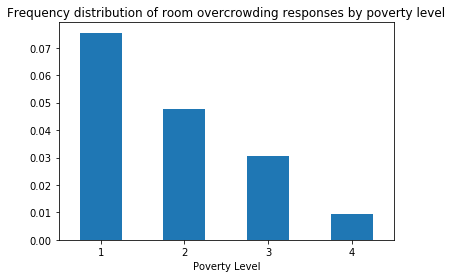

In [327]:
# Plot frequency percentages by overcrowding by rooms
overcrowdedbyrooms_crosstab[1].plot(kind='bar')
plt.title('Frequency distribution of room overcrowding responses by poverty level')
plt.xlabel("Poverty Level")
plt.xticks(rotation=0)
plt.show()

In [107]:
overcrowded2.groupby(['Overcrowdingbyrooms','PovertyLevel']).count()

HouseholdID  rooms  bedrooms  \
Overcrowdingbyrooms PovertyLevel                                 
0                   1                     698    698       698   
                    2                    1521   1521      1521   
                    3                    1172   1172      1172   
                    4                    5940   5940      5940   
1                   1                      57     57        57   
                    2                      76     76        76   
                    3                      37     37        37   
                    4                      56     56        56   

                                  household_size  Overcrowdingbybedrooms  \
Overcrowdingbyrooms PovertyLevel                                           
0                   1                        698                     698   
                    2                       1521                    1521   
                    3                       1172                    1172   
                    4                       5940                    5940   
1                   1                         57                      57   
                    2                         76                      76   
                    3                         37                      37   
                    4                         56                      56   

                                  Numberofpersons  no_people_room  \
Overcrowdingbyrooms PovertyLevel                                    
0                   1                         698             698   
                    2                        1521            1521   
                    3                        1172            1172   
                    4                        5940            5940   
1                   1                          57              57   
                    2                          76              76   
                    3                          37              37   
                    4                          56              56   

                                  no_people_bedroom  RespondentsperHousehold  
Overcrowdingbyrooms PovertyLevel                                              
0                   1                           698                      698  
                    2                          1521                     1521  
                    3                          1172                     1172  
                    4                          5940                     5940  
1                   1                            57                       57  
                    2                            76                       76  
                    3                            37                       37  
                    4                            56                       56

#### Number of people per bedroom by poverty level 

In [329]:
overcrowdedbybedrooms_crosstab = pd.crosstab(overcrowded2.PovertyLevel, overcrowded2.Overcrowdingbybedrooms, normalize='index')
overcrowdedbybedrooms_crosstab

Overcrowdingbybedrooms,0,1
PovertyLevel,,
1,0.852980,0.147020
2,0.932373,0.067627
3,0.951199,0.048801
4,0.985657,0.014343


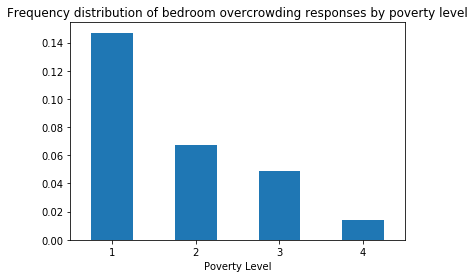

In [330]:
# Plot frequency percentages by overcrowding by bedrooms
overcrowdedbybedrooms_crosstab[1].plot(kind='bar')
plt.title('Frequency distribution of bedroom overcrowding responses by poverty level')
plt.xlabel("Poverty Level")
plt.xticks(rotation=0)
plt.show()

In [109]:
overcrowded2.groupby(['Overcrowdingbybedrooms','PovertyLevel']).count()

HouseholdID  rooms  bedrooms  \
Overcrowdingbybedrooms PovertyLevel                                 
0                      1                     644    644       644   
                       2                    1489   1489      1489   
                       3                    1150   1150      1150   
                       4                    5910   5910      5910   
1                      1                     111    111       111   
                       2                     108    108       108   
                       3                      59     59        59   
                       4                      86     86        86   

                                     household_size  Overcrowdingbyrooms  \
Overcrowdingbybedrooms PovertyLevel                                        
0                      1                        644                  644   
                       2                       1489                 1489   
                       3                       1150                 1150   
                       4                       5910                 5910   
1                      1                        111                  111   
                       2                        108                  108   
                       3                         59                   59   
                       4                         86                   86   

                                     Numberofpersons  no_people_room  \
Overcrowdingbybedrooms PovertyLevel                                    
0                      1                         644             644   
                       2                        1489            1489   
                       3                        1150            1150   
                       4                        5910            5910   
1                      1                         111             111   
                       2                         108             108   
                       3                          59              59   
                       4                          86              86   

                                     no_people_bedroom  \
Overcrowdingbybedrooms PovertyLevel                      
0                      1                           644   
                       2                          1489   
                       3                          1150   
                       4                          5910   
1                      1                           111   
                       2                           108   
                       3                            59   
                       4                            86   

                                     RespondentsperHousehold  
Overcrowdingbybedrooms PovertyLevel                           
0                      1                                 644  
                       2                                1489  
                       3                                1150  
                       4                                5910  
1                      1                                 111  
                       2                                 108  
                       3                                  59  
                       4                                  86

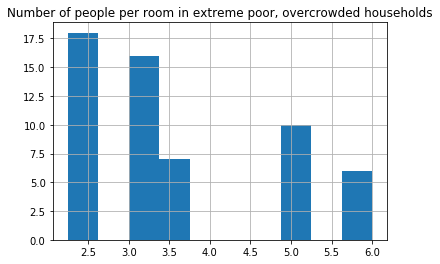

In [244]:
# Histogram for extreme poverty
povertylevel1 = overcrowded2[overcrowded2.PovertyLevel == 1]
povertylevel1[povertylevel1.Overcrowdingbyrooms == 1].hist('no_people_room')
#povertylevel1[povertylevel1.Overcrowdingbyrooms == 1].no_people_room.value_counts().plot(kind='bar')
plt.title("Number of people per room in extreme poor, overcrowded households")
plt.show()

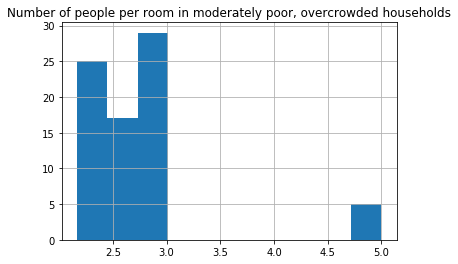

In [245]:
# Histogram for moderate poverty
povertylevel2 = overcrowded2[overcrowded2.PovertyLevel == 2]
povertylevel2[povertylevel2.Overcrowdingbyrooms == 1].hist('no_people_room')
#povertylevel1[povertylevel1.Overcrowdingbyrooms == 1].no_people_room.value_counts().plot(kind='bar')
plt.title("Number of people per room in moderately poor, overcrowded households")
plt.show()

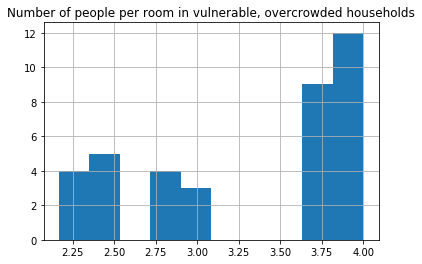

In [246]:
# Histogram for vulnerable poverty
povertylevel3 = overcrowded2[overcrowded2.PovertyLevel == 3]
povertylevel3[povertylevel3.Overcrowdingbyrooms == 1].hist('no_people_room')
plt.title("Number of people per room in vulnerable, overcrowded households")
plt.show()

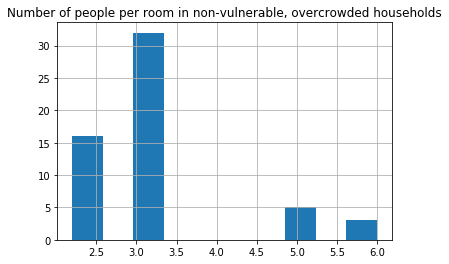

In [247]:
# Histogram for non-vulnerable poverty
povertylevel4 = overcrowded2[overcrowded2.PovertyLevel == 4]
povertylevel4[povertylevel4.Overcrowdingbyrooms == 1].hist('no_people_room')
plt.title("Number of people per room in non-vulnerable, overcrowded households")
plt.show()